<a href="https://colab.research.google.com/github/hernansalinas/autogrades/blob/main/Laboratorios_Taller/Lab06_ec_variable.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Ecuaciones de una variable:

Para los siguiente problemas:


1.0 ¿Para que ángulo el area del segmento circular es igual a un cuarto del area de la circunferencia?

- Muestre que la expresión que permite resolver el problema:


\begin{equation}
\theta - \sin \theta = \frac{\pi}{2}
\end{equation}


- ¿Construya una grafica para theta?,  Alrededor de que punto esta solución.(Para este punto se recomienda emplear un data frame de pandas )

- Emplee el metodo de biseccion, punto fijo,  newton y secante  para comprobar la solución intuida del apartado anterior.


2.0 An object falling vertically through the air is subjected to viscous resistance as well as to the force
of gravity. Assume that an object with mass m is dropped from a height s0 and that the height of the
object after t seconds is

\begin{equation}
s(t)=s_0 - \frac{mg}{k}t+\frac{m^2g}{k}t(1-e^{-kt/m})
\end{equation}

where $g = 32.17 ft/s2$ and $k$ represents the coefficient of air resistance in $lbs/ft$. Suppose $s0 = 300 ft$,
$m = 0.25$ lb, and $k = 0.1$ lbs/ft. Find, to within $0.01$ s, the time it takes this quarter-pounder to hit the
ground

- Emplee el metodo de biseccion, punto fijo,  newton y secante  para comprobrar la solución.



3.0 En la teoria de campo medio, La magnetización como función de la temperatura de un material magnético  puede ser calculada como:

\begin{equation}
m(T) = \tanh\left( \frac{m(T)}{T} \right)
\end{equation}

donde m y T son la magnetizacion y temperatura reducida respectivamente

Para T = 0.5, determine:

a. La magnetización reducida empleando el metodo de la secante(Muestre su resultado con 4 cifras)

b. Valide su respuestado con el metodo de punto fijo.
(Muestre su resultado con 4 cifras)

d. Defina T = np.linspace(0.1,0.99,100), y emple el metodo de la secante para construir un gráfico de magnetización reducida como función de la temperatura para los  100 valores  de T.



5. Construir un fractal empleando el metodo de Newton-Raphson,
(Reproducir código y entender)
\begin{equation}
z_{n+1} = z_n -a \frac{f(z)}{f'(z)}
\end{equation}



\begin{equation}
f'(z) = \frac{ f(z+h)+f(z) }{h}
\end{equation}


Replicar el codigo y entender.


```

import numpy as np
import matplotlib.pylab as plt
from PIL import Image

Npx_X = 80 #Numero de pixeles en x
Npx_Y = 80 #Numero de pixeles en y

image = Image.new("RGB", (Npx_X, Npx_Y)) #Creacion de la imagen inicial

npx = np.arange(0, Npx_X)
npy = np.arange(0, Npx_Y)

xmin = -1
xmax = 1
ymin = -1
ymax = 1
#Transformación al plano complejo en un rectangulo (xmin, xmax), (ymin, ymax)
zx = npx * (xmax - xmin) / (Npx_X - 1)   + xmin
zy = npy * (ymax-ymin) / (Npx_Y - 1) + ymin

#Definicion  la funcion y las derivada
def f(z):
  return z**3 - 1

def fp(z):
  return 3*z**2

h = 1E-4
def fpn(z, h):
  return (f(z+h)-f(z))/h
  

a = 0.2
Niteraciones = 120
eps = 1E-8

x = - 1
for zx_ in zx:
  x = x + 1
  y = -1
  for zy_ in zy:
      y = y + 1
      Z_0 = complex(zx_, zy_)
    
      for i in range(0, Niteraciones):
        Z = Z_0 - a * f(Z_0)/fp(Z_0)

        if( abs(Z-Z_0)<= eps):
          break
          
        Z_0 = Z
      #print(i)
      #print(i)
      r, g, b = i % 4 *64 , i % 8 *16, i% 16* 16
      
      image.putpixel((x,y), (r,g,b) )


plt.imshow(image)
#plt.xlim(400, 600)
#plt.ylim(400, 523)
```


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import optimize


In [3]:
theta=lambda x: x - np.sin(x) - np.pi/2

In [4]:
x = np.arange(0,2*np.pi,0.01)
y=theta(x)


In [5]:
d={"theta":x, "funcion":y} #serie
df=pd.DataFrame(d) #dataframe



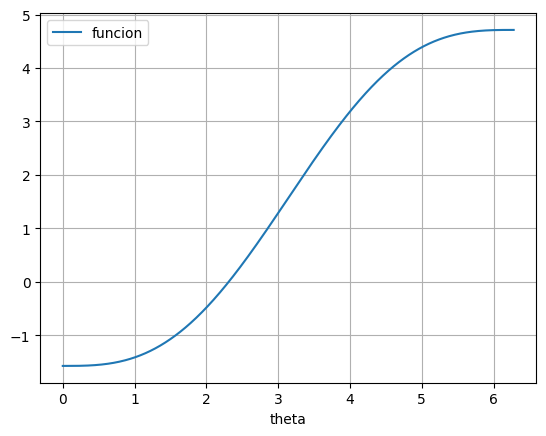

In [6]:
df.plot.line(x = "theta", y= "funcion")
plt.grid()
plt.show()

In [7]:
dt_filtro = df[df.funcion.between(-0.1,0.1)]
dt_filtro


,theta,funcion
225,2.25,-0.098870
226,2.26,-0.082549
227,2.27,-0.066151
228,2.28,-0.049677
229,2.29,-0.033127
230,2.30,-0.016502
231,2.31,0.000198
232,2.32,0.016972
233,2.33,0.033819
234,2.34,0.050739


In [8]:
#metodo de biseccion
optimize.bisect


<function scipy.optimize._zeros_py.bisect(f, a, b, args=(), xtol=2e-12, rtol=8.881784197001252e-16, maxiter=100, full_output=False, disp=True)>

In [9]:
raiz = optimize.bisect(theta,2.30,2.31) #evaluar la funcion en diferentes puntos
print("la raiz usando el metodo de biseccion sera: ", raiz)

la raiz usando el metodo de biseccion sera:  2.3098814600089104


In [10]:
#metodo de newton

#optimize.newton?
theta=lambda x: x - np.sin(x) - np.pi/2
dtheta= lambda x:1 - np.cos(x)


In [11]:
raiz_newton=optimize.newton(theta,2.30, dtheta)
print("la raiz usando el metodo de la biseccion", raiz_newton)

la raiz usando el metodo de la biseccion 2.309881460010057


In [12]:
#metodo fijo
#optimize.fixed_point(theta,)

gl=lambda x:x -theta(x)
b=optimize.fixed_point(gl, 2.30)
print("por el metodo de punto fijo", b)



por el metodo de punto fijo 2.3098814600100575


In [13]:
#metodo de la secante
raiz_secante=optimize.newton(theta, 2.30)
print("la raiz es ",raiz_secante)

la raiz es  2.3098814600100575


In [14]:
#segundo punto del taller --------------------------------------------------------------------------------------------------------------------------
#-----------------------------------------------------------------------------------------------------------------------------------------------------------
#-----------------------------------------------------------------------------------------------------------------------------------------------------------
#-----------------------------------------------------------------------------------------------------------------------------------------------------------
#-----------------------------------------------------------------------------------------------------------------------------------------------------------

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import optimize
from sympy import*


In [16]:
tiempo=lambda x: 300 -(((0.25*32.17)/(0.1)) * x ) + (((0.25**2)*32.17)/(0.1) * x) * (1-np.exp((-0.1*x)/(0.25)))

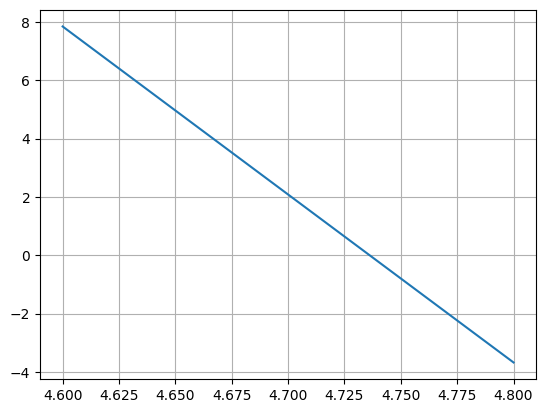

In [17]:
x = np.arange(4.6,4.8,0.01)
y=tiempo(x)
plt.plot(x,y)
plt.grid()
plt.show()

In [18]:
d = {"tiempo":x, "funcion":y}
df=pd.DataFrame(d)
df

,tiempo,funcion
0,4.60,7.844925
1,4.61,7.268570
2,4.62,6.692236
3,4.63,6.115921
4,4.64,5.539624
5,4.65,4.963346
6,4.66,4.387085
7,4.67,3.810841
8,4.68,3.234614
9,4.69,2.658402


In [19]:
#metodo de biseccion
optimize.bisect
raiz = optimize.bisect(tiempo,4.73,4.74)
print("por el metodo de biseccion es", raiz)

por el metodo de biseccion es 4.736139137604041


In [20]:
import sympy as sp
import numpy as np
x=sp.Symbol("x")
tiempo = 300 -(((0.25*32.17)/(0.1)) * x ) + (((0.25**2)*32.17)/(0.1) * x) * (1-sp.exp((-0.1*x)/(0.25)))
derivada_lambda= sp.lambdify(x, sp.diff(tiempo,x))
tiempo=lambda x: 300 -(((0.25*32.17)/(0.1)) * x ) + (((0.25**2)*32.17)/(0.1) * x) * (1-np.exp((-0.1*x)/(0.25)))

In [21]:
#metodo de newton
raiz_newton=optimize.newton(tiempo,4.73,derivada_lambda)
print("por el metodo de newton es", raiz_newton)

por el metodo de newton es 4.73613913760349


In [22]:
#metodo del punto fijo
tiempo=lambda x: 300 -(((0.25*32.17)/(0.1)) * x ) + (((0.25**2)*32.17)/(0.1) * x) * (1-np.exp((-0.1*x)/(0.25)))
b=optimize.fixed_point(tiempo,4.73)
print("por el punto fijo es",b)

por el punto fijo es 4.65534478295253


In [23]:
#metodo de la secante
raiz_secante=optimize.newton(tiempo,4.73)
print("por el metodo de la secante es",raiz_secante)

por el metodo de la secante es 4.73613913760349


In [24]:
#tercer punto del taller
#---------------------------------------------------------------------------------------------------------------------------------------------
#---------------------------------------------------------------------------------------------------------------------------------------------
#---------------------------------------------------------------------------------------------------------------------------------------------
#---------------------------------------------------------------------------------------------------------------------------------------------
#---------------------------------------------------------------------------------------------------------------------------------------------

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import optimize
from sympy import*


In [45]:
#se refiere a si misma, por lo tanto no podemos usar lambda
magnetizacion = lambda m: m-np.tanh((m/(0.5)))


m=np.linspace(-2,2,10)
y=magnetizacion(m)

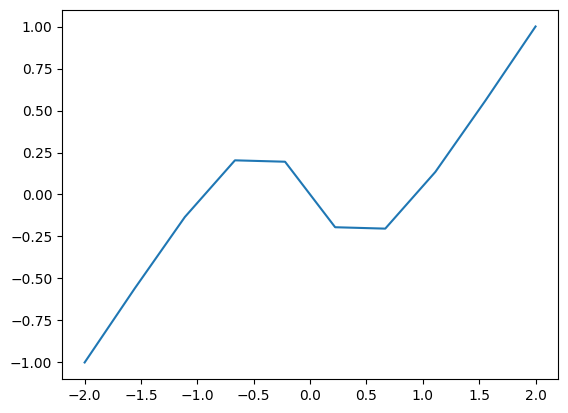

In [46]:

plt.plot(m,y)
plt.show()

In [48]:
#metodo de la secante
k=optimize.newton(magnetizacion, -0.5)
print("la raiz es ",round(k,4))


la raiz es  -0.9575


In [57]:
#metodo del punto fijo
g = lambda m:m-magnetizacion(m)
b=optimize.fixed_point(g, 0.40)
print("por el metodo de punto fijo", np.round(b,4))

por el metodo de punto fijo 0.9575


In [ ]:
#
T= np.linspace(0.1,0.99,100)


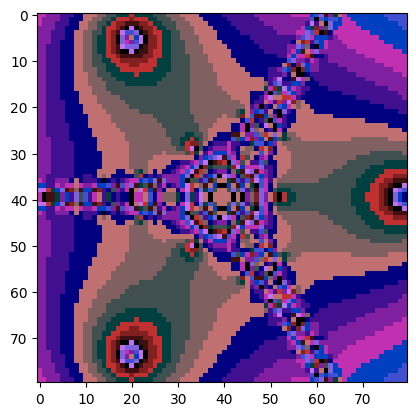

In [58]:
import numpy as np
import matplotlib.pylab as plt
from PIL import Image

Npx_X = 80 #Numero de pixeles en x
Npx_Y = 80 #Numero de pixeles en y

image = Image.new("RGB", (Npx_X, Npx_Y)) #Creacion de la imagen inicial

npx = np.arange(0, Npx_X)
npy = np.arange(0, Npx_Y)

xmin = -1
xmax = 1
ymin = -1
ymax = 1
# Transformación al plano complejo en un rectangulo (xmin, xmax), (ymin, ymax)
zx = npx * (xmax - xmin) / (Npx_X - 1)   + xmin
zy = npy * (ymax-ymin) / (Npx_Y - 1) + ymin

# Definicion  la funcion y las derivada
def f(z):
  return z**3 - 1

def fp(z):
  return 3*z**2

h = 1E-4
def fpn(z, h):
  return (f(z+h)-f(z))/h


a = 0.2
Niteraciones = 120
eps = 1E-8

x = - 1
for zx_ in zx:
  x = x + 1
  y = -1
  for zy_ in zy:
      y = y + 1
      Z_0 = complex(zx_, zy_)

      for i in range(0, Niteraciones):
        Z = Z_0 - a * f(Z_0)/fp(Z_0)

        if( abs(Z-Z_0)<= eps):
          break

        Z_0 = Z
      #print(i)
      #print(i)
      r, g, b = i % 4 *64 , i % 8 *16, i% 16* 16

      image.putpixel((x,y), (r,g,b) )


plt.imshow(image)
# plt.xlim(400, 600)
# plt.ylim(400, 523)